In [7]:
from sqlalchemy import create_engine
import pandas as pd
import os

df_spotify = pd.read_csv('../../raw_data/spotify_raw.csv')   

df_spotify_head = df_spotify.head()

df_spotify_info = df_spotify.info()

(df_spotify_head, df_spotify_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

(   Unnamed: 0                track_id                 artists  \
 0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
 1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
 2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
 3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
 4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
 
                                           album_name  \
 0                                             Comedy   
 1                                   Ghost (Acoustic)   
 2                                     To Begin Again   
 3  Crazy Rich Asians (Original Motion Picture Sou...   
 4                                            Hold On   
 
                    track_name  popularity  duration_ms  explicit  \
 0                      Comedy          73       230666     False   
 1            Ghost - Acoustic          55       149610     False   
 2              To Begin Again          57       21

| Columna | Descripción |
|---|---|
| track_id | Identificador único de la canción. |
| track_name | Nombre de la canción. |
| track_artist | Artista o grupo que interpreta la canción. |
| track_popularity | Popularidad de la canción. |
| track_album_id | Identificador único del álbum de la canción. |
| track_album_name | Nombre del álbum de la canción. |
| track_album_release_date | Fecha de lanzamiento del álbum. |
| playlist_name | Nombre de la lista de reproducción en la que aparece la canción. |
| playlist_id | Identificador único de la lista de reproducción. |
| playlist_genre | Género de la lista de reproducción. |
| playlist_subgenre | Subgénero de la lista de reproducción. |
| danceability | Medida de qué tan adecuada es una canción para bailar. |
| energy | Medida de la intensidad y actividad de una canción. |
| key | La tonalidad en la que está la canción. |
| loudness | Volumen general de una canción en decibelios. |
| mode | Modalidad de la canción (mayor o menor). |
| speechiness | Medida de la presencia de palabras habladas en una canción. |
| acousticness | Medida de qué tan acústica es una canción. |
| instrumentalness | Medida de qué tan instrumental es una canción. |
| liveness | Medida de la presencia de audiencia en la grabación de una canción. |
| valence | Medida de la positividad que transmite una canción. |
| tempo | Tempo de la canción en pulsos por minuto. |
| duration_ms | Duración de la canción en milisegundos. |
| time_signature | Compás de la canción. |


# **Cleaning**

In [8]:
# Remove any duplicate entries
df_spotify.drop_duplicates(inplace=True)

# Check for and handle missing values
print(df_spotify.isnull().sum())

df_spotify = df_spotify.dropna()  

# Ensure data types are correct
print(df_spotify.dtypes)


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               f

In [9]:
# Convert all text columns to a consistent format
text_columns = ['artists', 'album_name', 'track_name', 'track_genre']
for col in text_columns:
    df_spotify[col] = df_spotify[col].str.title()

# Check for and handle missing values
df_spotify.fillna('Unknown', inplace=True)  

# Convert explicit column to boolean
df_spotify['explicit'] = df_spotify['explicit'].astype(bool)

# Ensure numerical columns are the correct data type
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for col in numerical_columns:
    df_spotify[col] = pd.to_numeric(df_spotify[col], errors='coerce')  # Coerce any errors to NaN

# Handle any NaN values that could be introduced by conversion errors
df_spotify.dropna(inplace=True)

# Check the cleaned dataset
print(df_spotify.info())
print(df_spotify.head())

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

# **Charts (analysis)**

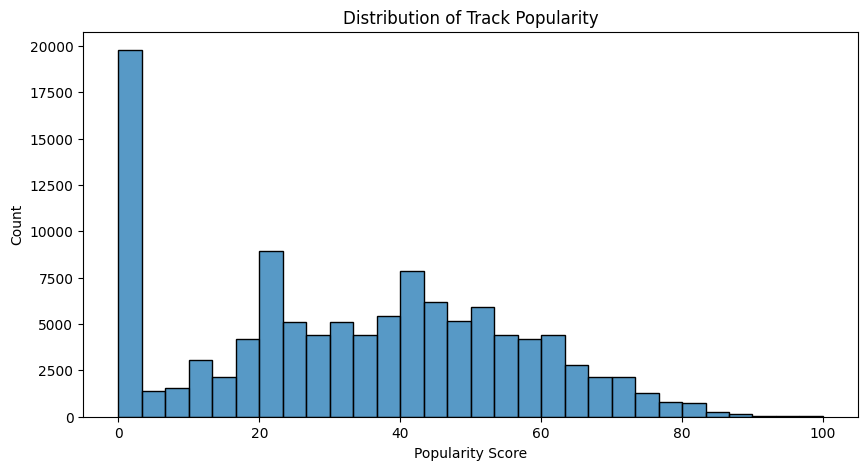

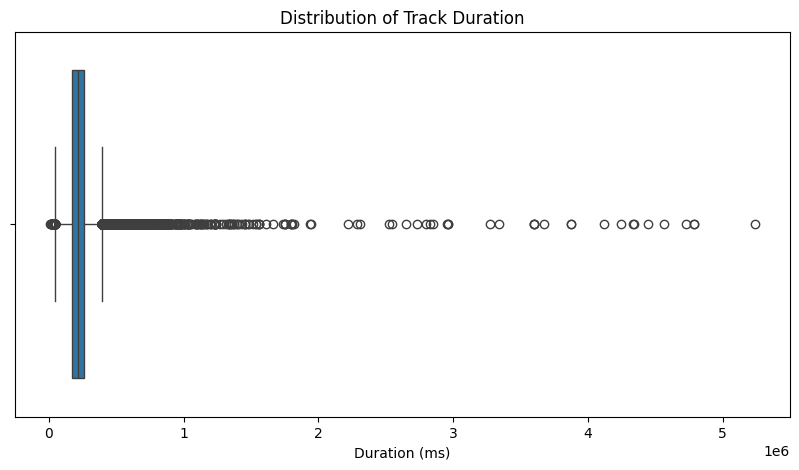

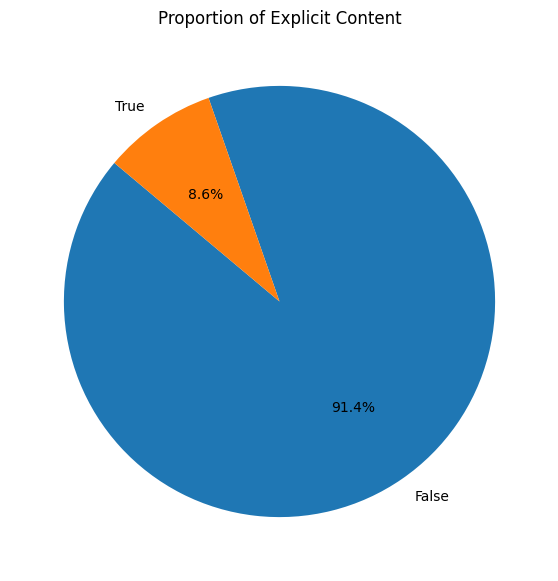

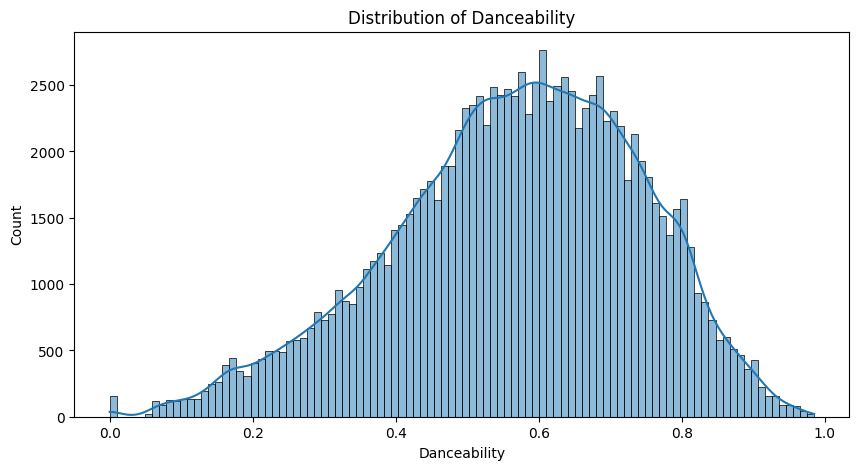

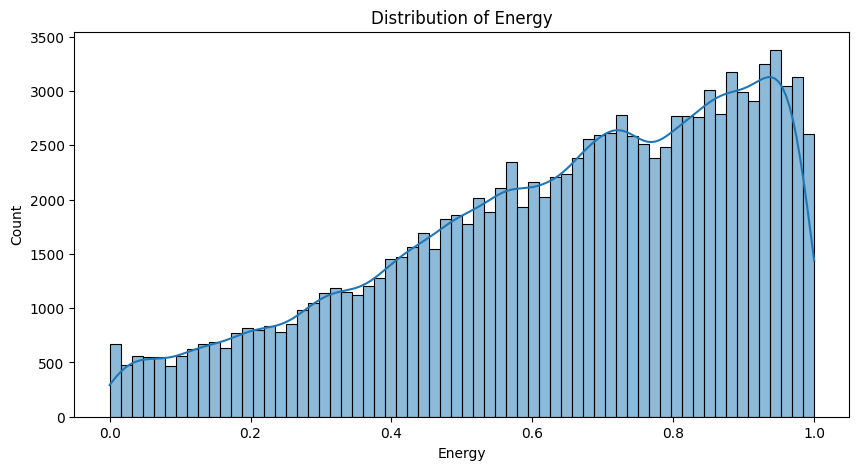

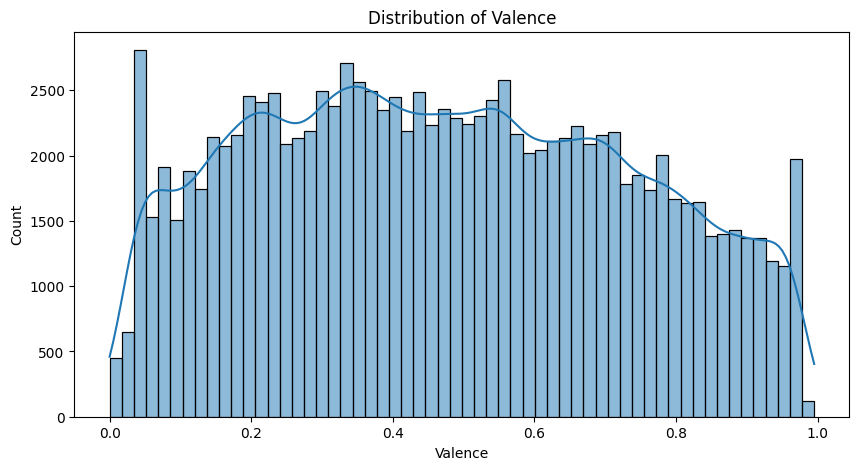

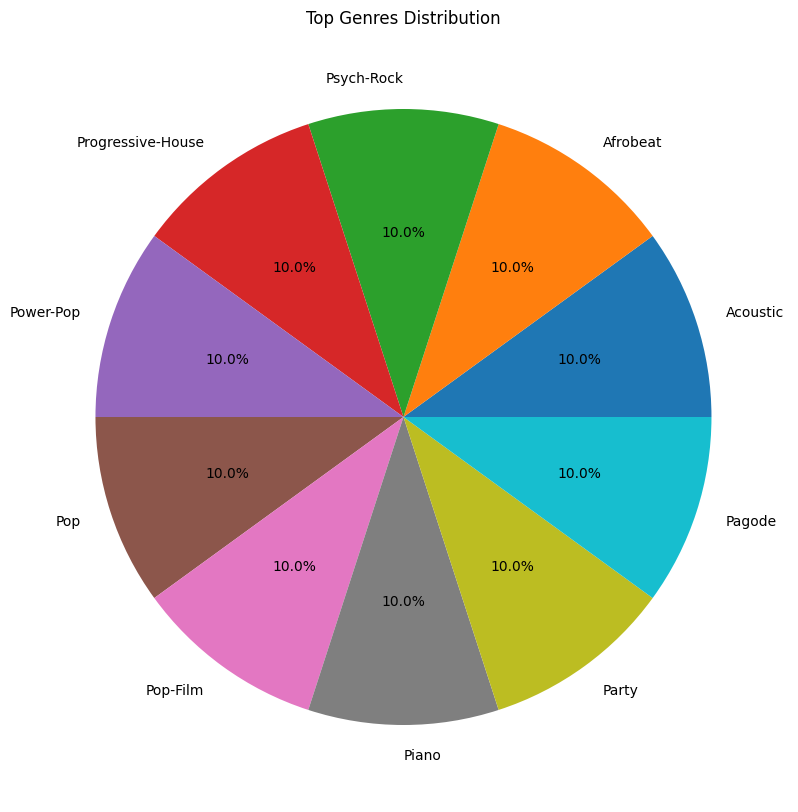

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Popularity Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_spotify['popularity'], bins=30)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Count')
plt.show()

# Duration Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_spotify['duration_ms'])
plt.title('Distribution of Track Duration')
plt.xlabel('Duration (ms)')
plt.show()

# Explicit Content Analysis
plt.figure(figsize=(7, 7))
df_spotify['explicit'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Explicit Content')
plt.ylabel('')
plt.show()

# Audio Features Analysis
features_to_plot = ['danceability', 'energy', 'valence']
for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_spotify[feature], kde=True)
    plt.title(f'Distribution of {feature.title()}')
    plt.xlabel(feature.title())
    plt.ylabel('Count')
    plt.show()

# Genre Analysis
plt.figure(figsize=(10, 10))
df_spotify['track_genre'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Genres Distribution')
plt.ylabel('')
plt.show()


Based on the charts you provided, here are some insights from each:

### **Distribution of Track Popularity:**

The popularity scores are right-skewed, suggesting most tracks have lower popularity scores.
There's a significant peak at the score of 0, indicating a large number of tracks are not popular at all.
There is a gradual decline in the number of tracks as the popularity increases, with very few tracks reaching a score close to 100.

### **Distribution of Track Duration:**

The track duration data appears to have outliers, as indicated by the points spread out far to the right on the x-axis.
Most of the tracks are clustered within a certain range, likely around 200,000 to 300,000 milliseconds (200 to 300 seconds), which is typical for standard song lengths.
Proportion of Explicit Content:

A small fraction (approximately 8.6%) of tracks are marked as explicit.
The overwhelming majority of tracks (91.4%) in the dataset are not explicit, suggesting a family-friendly trend in the dataset or the specific selection of songs.

### **Distribution of Danceability:**

The danceability feature is normally distributed, indicating that most tracks have a moderate level of danceability.
The peak of the distribution is around the 0.6 to 0.7 mark, meaning that many tracks are quite danceable.

### **Distribution of Energy:**

The energy feature also follows a normal distribution but with a slight skew towards higher energy levels.
Most tracks have an energy rating around 0.6 to 0.8, suggesting the presence of more energetic tracks in the dataset.

### **Distribution of Valence:**

The valence feature has a multimodal distribution, indicating the presence of clusters of tracks with different levels of musical positivity.
The distribution has peaks at the lower end and towards the middle, with fewer tracks having very high valence.

### **Top Genres Distribution:**

The genre distribution shows a diverse representation of genres.
The pie chart suggests a somewhat equal distribution among the top genres, each occupying around 10% of the dataset, though without exact numbers, this is an estimate.
The actual diversity in genre might be greater or less than suggested due to the limited number of genres shown in the pie chart.

In [11]:
# Zero Popularity Peak Analysis
zero_popularity = df_spotify[df_spotify['popularity'] == 0]
# Output some sample data for tracks with zero popularity
zero_popularity_sample = zero_popularity.sample(5)

# Outliers in Track Duration Analysis
Q1 = df_spotify['duration_ms'].quantile(0.25)
Q3 = df_spotify['duration_ms'].quantile(0.75)
IQR = Q3 - Q1
duration_outliers = df_spotify[(df_spotify['duration_ms'] < (Q1 - 1.5 * IQR)) | (df_spotify['duration_ms'] > (Q3 + 1.5 * IQR))]
# Output some sample data for duration outliers
duration_outliers_sample = duration_outliers.sample(5)

# Audio Features and Genre Relationship Analysis
top_genres = df_spotify['track_genre'].value_counts().nlargest(10).index
top_genres_df = df_spotify[df_spotify['track_genre'].isin(top_genres)]

# Output correlation matrix for top genres
audio_features = ['energy', 'danceability', 'valence']
correlation_matrix = top_genres_df[audio_features].corr()

# Output the count of tracks by genre
genre_distribution = df_spotify['track_genre'].value_counts()

print("Sample Tracks with Zero Popularity:")
print(zero_popularity_sample)

print("\nSample Duration Outliers:")
print(duration_outliers_sample)

print("\nAudio Features Correlation Matrix for Top Genres:")
print(correlation_matrix)

print("\nGenre Distribution Count:")
print(genre_distribution)


Sample Tracks with Zero Popularity:
       Unnamed: 0                track_id  \
79189       79189  1tTjmC6FSSFE04FkNpa3xJ   
21571       21571  5UX9kezPyfYcLYWfhLJryU   
32049       32049  34kHexFdmug6nYZzkz3hc0   
79245       79245  5sLrsH9u2lsp3PPZPV3Szy   
78169       78169  6NcruLjcmzmgwwpW09HXzT   

                                                artists  \
79189                                      Jim Brickman   
21571                                      Stalk Ashley   
32049                                       Babasónicos   
79245  Vince Guaraldi;Lee Mendelson;Vince Guaraldi Trio   
78169                              Almklausi;Specktakel   

                     album_name                             track_name  \
79189      Christmas Faves 2022     Believe - From "The Polar Express"   
21571                   New Rnb                                  Young   
32049          Noches De Lluvia                    Como Eran Las Cosas   
79245  Weihnachten Klassik 2022  Christmas

## **some insights:**

Based on the provided output, let's analyze the information point by point:

### Sample Tracks with Zero Popularity:
- The tracks with zero popularity span a diverse set of genres including Classical, Industrial, Indie, Iranian, and Latino. This variety suggests that zero popularity does not correlate with a specific genre or type of music.
- The very low popularity score could indicate that these tracks are either new and have not yet garnered attention, or they might be niche tracks that do not have widespread appeal.
- The tracks have varied duration, from as short as 71,413 ms (approximately 1.2 minutes) to as long as 333,800 ms (approximately 5.6 minutes), indicating that track length is not a determining factor for zero popularity.

### Sample Duration Outliers:
- The duration outliers include tracks that are significantly longer than typical songs, with durations ranging from around 6 to almost 20 minutes.
- These outliers include genres such as Afrobeat, Black-Metal, Blues, K-Pop, and Psych-Rock, which implies that longer tracks may be common in certain styles of music, or may include live versions, extended mixes, or medleys.
- Notably, these tracks do have some popularity, which indicates that despite their length, they have found an audience.

### Audio Features Correlation Matrix for Top Genres:
- The correlation matrix indicates a positive correlation between valence and danceability, which makes sense as songs with a higher valence (more positive or happy) are often more danceable.
- There is also a positive, though weaker, correlation between energy and valence, suggesting that more energetic tracks tend to be more positive.
- Interestingly, there is a negligible correlation between energy and danceability, which might imply that a song can be danceable regardless of its energy level.

### Genre Distribution Count:
- The top genres in the dataset are Acoustic, Rock, Reggaeton, Reggae, and Punk-Rock, each represented by 1,000 tracks.
- The least represented genres in the sample provided are Honky-Tonk, Dance, German, Classical, and Romance, with the latter having 904 tracks.
- This distribution reflects a wide range of music preferences and indicates a diverse collection of songs in the dataset.

Overall, the zero popularity tracks and the duration outliers suggest that there's a wide diversity in the dataset not only in terms of genres but also in terms of track lengths and audience reach. The correlation between audio features and the spread of genres speaks to the potential for deeper analysis, such as clustering similar songs based on these features or exploring the dataset for trends over time or by geography, which might give us insight into cultural preferences or the impact of music promotions.

In [12]:
df_spotify.to_csv('../../data/spotify_dataset_cleaned.csv', index=False)
